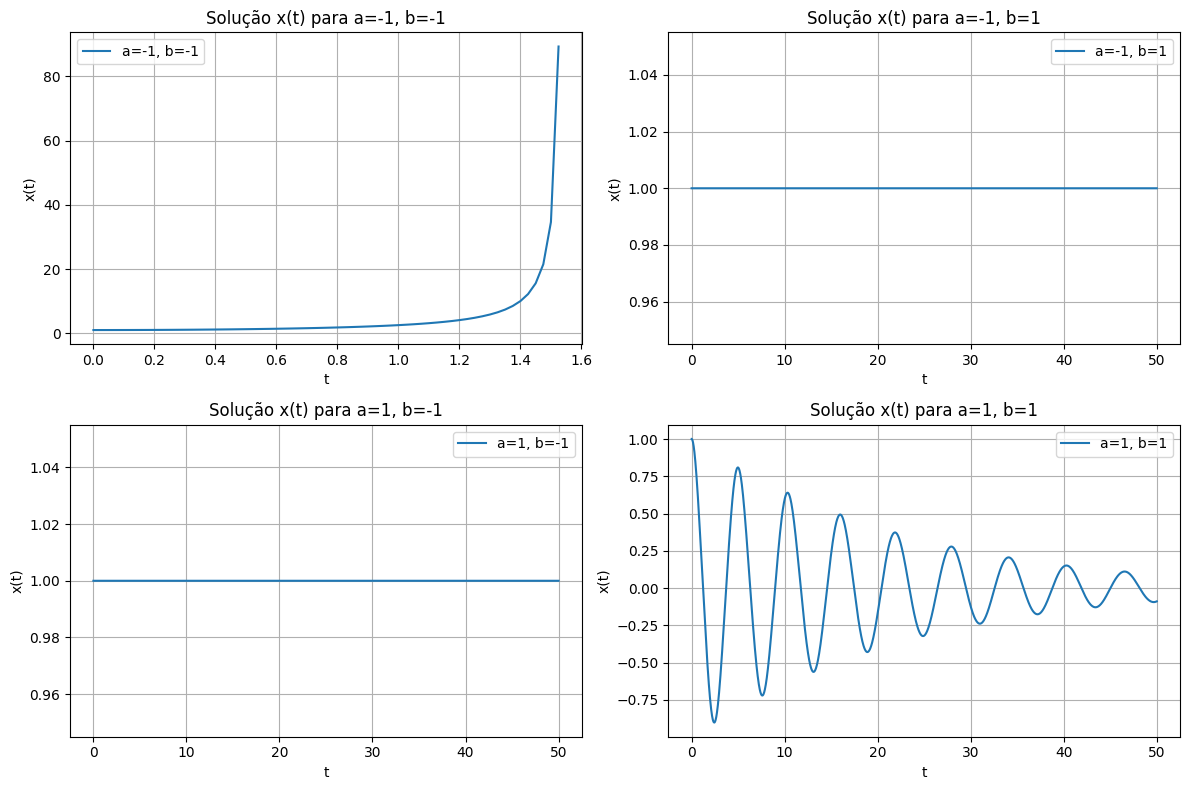

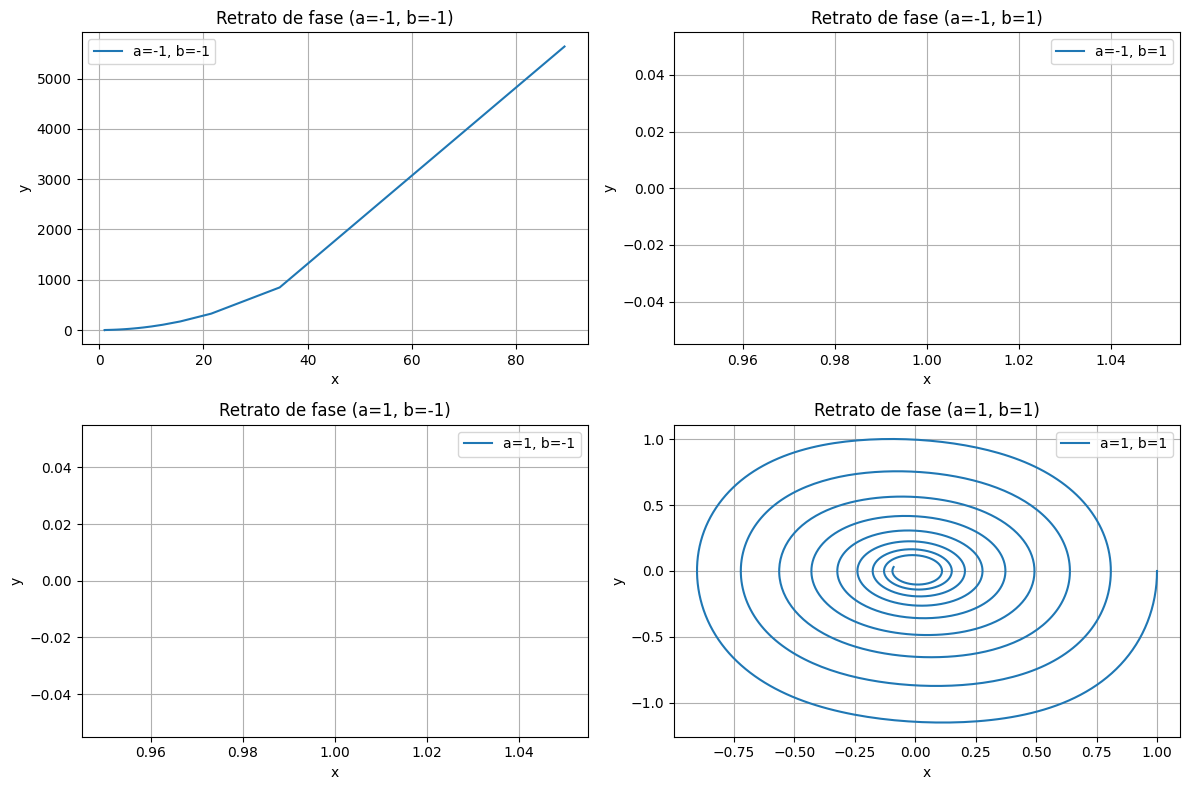

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definição do sistema de EDOs
def duffing(t, z, a, b, c):
    x, y = z
    dxdt = y
    dydt = -c*y - a*x - b*x**3
    return [dxdt, dydt]

# Parâmetro de amortecimento
c = 0.1

# Casos solicitados
parametros = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Condições iniciais
z0 = [1.0, 0.0]  # posição inicial x(0)=1, velocidade inicial y(0)=0

# Intervalo de integração
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 2000)

# Criar figura
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (a, b) in enumerate(parametros):
    sol = solve_ivp(duffing, t_span, z0, args=(a, b, c), t_eval=t_eval, method="RK45")

    ax = axes[i]
    ax.plot(sol.t, sol.y[0], label=f"a={a}, b={b}")
    ax.set_title(f"Solução x(t) para a={a}, b={b}")
    ax.set_xlabel("t")
    ax.set_ylabel("x(t)")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

# Também é interessante plotar o retrato de fase (x,y)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (a, b) in enumerate(parametros):
    sol = solve_ivp(duffing, t_span, z0, args=(a, b, c), t_eval=t_eval, method="RK45")

    ax = axes[i]
    ax.plot(sol.y[0], sol.y[1], label=f"a={a}, b={b}")
    ax.set_title(f"Retrato de fase (a={a}, b={b})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()
